In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib notebook

In [2]:
# Filepaths
trials = "data/clinicaltrial_data.csv"
drugs = "data/mouse_drug_data.csv"

trials_df = pd.read_csv(trials)
drugs_df = pd.read_csv(drugs)

In [3]:
# Drop duplicates
drugs_df = drugs_df.drop_duplicates(subset="Mouse ID", keep=False)

In [4]:
# Merge dataframes
df = trials_df.merge(drugs_df, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
# Tumor volume dataframe
tumor_df = df.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]
tumor_df.head()

# Calculate average tumor volume by drug
avg_tumor_vol = tumor_df.groupby(["Drug", "Timepoint"]).mean()
avg_tumor_vol.head()

# Standard error
avg_tumor_vol_sem = tumor_df.groupby(["Drug", "Timepoint"]).sem()
avg_tumor_vol_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

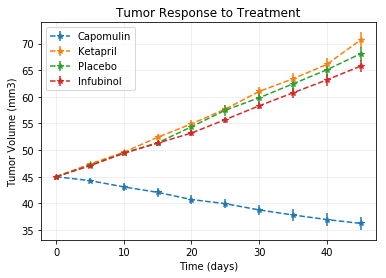

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot 
plt.errorbar(np.arange(0,50,5), avg_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"],
            yerr=avg_tumor_vol_sem.loc["Capomulin", "Tumor Volume (mm3)"], fmt="*--", label="Capomulin")
plt.errorbar(np.arange(0,50,5), avg_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"],
            yerr=avg_tumor_vol_sem.loc["Ketapril", "Tumor Volume (mm3)"], fmt="*--", label="Ketapril")
plt.errorbar(np.arange(0,50,5), avg_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"],
            yerr=avg_tumor_vol_sem.loc["Placebo", "Tumor Volume (mm3)"], fmt="*--", label="Placebo")
plt.errorbar(np.arange(0,50,5), avg_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"],
            yerr=avg_tumor_vol_sem.loc["Infubinol", "Tumor Volume (mm3)"], fmt="*--", label="Infubinol")

# Format plot
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(alpha=0.25)

# Plot and save
plt.show()
plt.savefig("images/tumor-response-to-treatment.png")

In [7]:
# Metastatic response to treatment
metastatic_df = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
metastatic_df = pd.DataFrame(metastatic_df)
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Standard error
metastatic_sem = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
metastatic_sem = pd.DataFrame(metastatic_sem)
metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

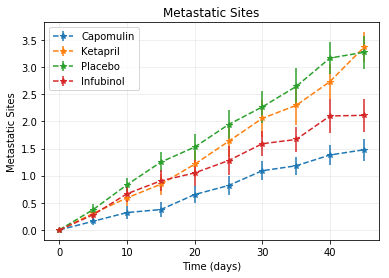

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot 
plt.errorbar(np.arange(0,50,5), metastatic_df.loc["Capomulin", "Metastatic Sites"],
            yerr=metastatic_sem.loc["Capomulin", "Metastatic Sites"], fmt="*--", label="Capomulin")
plt.errorbar(np.arange(0,50,5), metastatic_df.loc["Ketapril", "Metastatic Sites"],
            yerr=metastatic_sem.loc["Ketapril", "Metastatic Sites"], fmt="*--", label="Ketapril")
plt.errorbar(np.arange(0,50,5), metastatic_df.loc["Placebo", "Metastatic Sites"],
            yerr=metastatic_sem.loc["Placebo", "Metastatic Sites"], fmt="*--", label="Placebo")
plt.errorbar(np.arange(0,50,5), metastatic_df.loc["Infubinol", "Metastatic Sites"],
            yerr=metastatic_sem.loc["Infubinol", "Metastatic Sites"], fmt="*--", label="Infubinol")

# Format plot
plt.title("Metastatic Sites")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")
plt.grid(alpha=0.25)

# Plot and save
plt.show()
plt.savefig("images/metastatic-sites.png")

In [10]:
# Survival Rates
drug_results_survival_df = pd.DataFrame({'Mice' : df['Mouse ID'],
                                         'Drug' : df['Drug'], 'Timepoint' : df['Timepoint']})
drug_results_survival_df.head()

# Group by drug and timepoint
data_mice_count = drug_results_survival_df.groupby(['Drug', 'Timepoint'])
survival_count_df = pd.DataFrame(data_mice_count.count().reset_index())
survival_count_df = survival_count_df.rename(columns={'Mice' : '# of Surviving Mice'})
survival_count_df.head()

,Drug,Timepoint,# of Surviving Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Survival rate as percentage
survival_percent_df = pd.DataFrame({"Drug" : survival_count_df['Drug'], "Timepoint": survival_count_df['Timepoint'],
                                    "Survival %" : (survival_count_df['# of Surviving Mice'] / 25) * 100})
survival_percent_df.head()

,Drug,Timepoint,Survival %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [12]:
# Pivot dataframe
survival_percent_df = survival_percent_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival %')
survival_percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,96.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,92.0,100.0,92.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,84.0,96.0,84.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,60.0,96.0,84.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,60.0,92.0,76.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,52.0,92.0,72.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,48.0,92.0,68.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,36.0,84.0,60.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


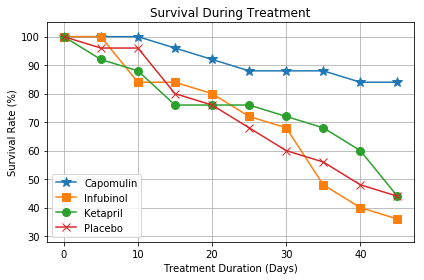

<Figure size 432x288 with 0 Axes>

In [13]:
# Minimum survival rate for y-axis limit
min_survival_percent = survival_percent_df.min()
min_survival_percent = min_survival_percent.min()
min_rate = min_survival_percent - 12

# x-axis values
x_axis = list(survival_percent_df.index.values)

# Survival rates
capo_survival_percent = survival_percent_df.loc[:, ['Capomulin']]
infub_survival_percent = survival_percent_df.loc[:, ['Infubinol']]
keta_survival_percent = survival_percent_df.loc[:, ['Ketapril']]
placebo_survival_percent = survival_percent_df.loc[:, ['Placebo']]

# Plot
plt.grid(True)
plt.ylim(min_survival_percent, 105)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Survival During Treatment")
plt.plot(x_axis, capo_survival_percent, marker = "*", ms = 10, label = "Capomulin")
plt.plot(x_axis, infub_survival_percent, marker = "s", ms = 8, label = "Infubinol")
plt.plot(x_axis, keta_survival_percent, marker = "o", ms = 8, label = "Ketapril")
plt.plot(x_axis, placebo_survival_percent, marker = "x", ms = 8, label = "Placebo")

#Add a legend and specify that we want a tight layout
plt.legend(frameon=True)
plt.tight_layout()

# Save the Figure
#plt.savefig('Survival Rates.png') 

#Display the figure
plt.show()
plt.savefig("images/survival-rate.png")

In [22]:
# Summary bar graph
# STUCK!!!

# Initial volumes by summing at timepoint = 0
initial_volumes = df.loc[(df["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

# Initialize tracking dataframe, looping through each mouse to find final tumor volume
end_vol = pd.DataFrame(columns = ["Drug", "Tumor Volume (mm3)"])

for mouse in df["Mouse ID"]:
    max_time = df.loc[df["Mouse ID"] == mouse, "Timepoint"].max()
    vol_final = df.loc[(df["Timepoint"] == max_time) & (df["Mouse ID"] == mouse), 
                       ["Drug", "Tumor Volume (mm3)"]]
    end_vol = pd.concat([end_vol, vol_final])

# Group final volumes by drug
end_group = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()


# Change in volume
vol_change = 100*(end_group - init_vol)/init_vol
print(vol_change)

Drug
Capomulin     644.715894
Ceftamin      875.580816
Infubinol     872.459167
Ketapril     1012.879819
Naftisol      978.852828
Placebo       923.774149
Propriva      728.338593
Ramicane      621.689640
Stelasyn      977.266859
Zoniferol     916.203418
Name: Tumor Volume (mm3), dtype: float64
